In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('train.csv')
data.describe()
#description.iloc[2,:]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,8507.000000,8507.000000,8507.000000,8.507000e+03,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,...,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000
mean,-0.000001,0.000007,0.000015,-8.104282e-07,0.000010,0.000011,0.015471,0.015463,0.015448,-0.016507,...,8.297015,-0.635826,7.031227,8.142438,-1.501420,-1.501451,-1.501339,-1.497626,-1.497649,-1.497529
std,0.000064,0.000069,0.000230,8.580479e-06,0.000038,0.000217,0.015712,0.015715,0.015722,0.027911,...,6.660245,1.607126,11.689025,6.417985,0.003717,0.003720,0.003670,0.002998,0.002996,0.003015
min,-0.000678,-0.002163,-0.002209,-4.170000e-05,-0.000260,-0.001626,-0.055309,-0.055316,-0.055328,-0.061243,...,0.712110,-0.891000,-0.535610,0.606140,-1.512400,-1.512400,-1.511800,-1.510400,-1.510400,-1.510500
25%,-0.000006,-0.000007,-0.000065,-5.435000e-06,-0.000006,-0.000065,0.012665,0.012656,0.012658,-0.035379,...,4.409750,-0.717045,1.500250,4.322250,-1.504100,-1.504100,-1.504000,-1.499400,-1.499400,-1.499300
50%,-0.000002,0.000004,0.000003,-1.740000e-06,0.000004,0.000002,0.019684,0.019680,0.019674,-0.028206,...,6.496200,-0.668240,3.235400,6.343600,-1.500800,-1.500800,-1.500700,-1.497900,-1.497900,-1.497800
75%,0.000002,0.000026,0.000089,3.790000e-06,0.000029,0.000078,0.025535,0.025531,0.025518,0.004998,...,9.822150,-0.578400,7.891750,9.731400,-1.498500,-1.498500,-1.498500,-1.496100,-1.496100,-1.496000
max,0.005784,0.004525,0.003330,7.080000e-05,0.000348,0.001982,0.046324,0.046319,0.046329,0.071934,...,89.372000,146.340000,145.860000,98.758000,-1.458500,-1.466200,-1.472600,-1.488400,-1.488400,-1.486800


In [3]:
len(data), len(data[data.iloc[:,48]=='n'])

(8507, 4268)

In [4]:
len(data[data.iloc[:,48]=='p1']), len(data[data.iloc[:,48]=='p2']),len(data[data.iloc[:,48]=='p3']),len(data[data.iloc[:,48]=='p4']),len(data[data.iloc[:,48]=='p5'])

(853, 413, 651, 1253, 1069)

In [19]:
data_binary = data.copy()
for i in range(len(data)):
    if data_binary.iloc[i,-1] == 'n':
        data_binary.iloc[i,-1] = 1
    else:
        data_binary.iloc[i,-1] = 0

data_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-6.190000e-06,-0.000037,0.000070,-2.560000e-05,-0.000041,-0.000116,0.027253,0.027290,0.027220,0.017966,...,-0.69694,1.6505,3.7807,-1.5016,-1.5017,-1.5016,-1.4939,-1.4939,-1.4940,0
1,-5.080000e-07,-0.000008,-0.000010,-2.900000e-06,-0.000001,0.000046,0.031973,0.031981,0.031992,-0.036266,...,-0.49315,9.1182,15.4610,-1.4980,-1.4980,-1.4980,-1.4978,-1.4978,-1.4978,1
2,2.950000e-06,0.000036,0.000004,1.580000e-05,0.000098,-0.000337,0.010780,0.010744,0.010740,-0.018368,...,-0.68272,1.8947,5.9028,-1.4970,-1.4971,-1.4972,-1.5038,-1.5039,-1.5036,0
3,-1.680000e-05,0.000026,0.000518,1.550000e-05,0.000072,0.000032,-0.037939,-0.037965,-0.038483,-0.030257,...,-0.71862,1.9076,5.5017,-1.4962,-1.4963,-1.4960,-1.5020,-1.5021,-1.5017,0
4,1.610000e-06,0.000018,-0.000156,-9.650000e-07,0.000009,0.000036,0.010411,0.010393,0.010549,-0.014548,...,-0.71715,1.0778,4.9960,-1.5042,-1.5042,-1.5041,-1.4911,-1.4911,-1.4915,0


In [8]:
data_multi = data[data.iloc[:,-1]!= 'n']

for i in range(len(data_multi)):
    if data_multi.iloc[i,-1] == 'p1':
        data_multi.iloc[i,-1] = 1
    elif data_multi.iloc[i,-1] == 'p2':
        data_multi.iloc[i,-1] = 2
    elif data_multi.iloc[i,-1] == 'p3':
        data_multi.iloc[i,-1] = 3
    elif data_multi.iloc[i,-1] == 'p4':
        data_multi.iloc[i,-1] = 4
    elif data_multi.iloc[i,-1] == 'p5':
        data_multi.iloc[i,-1] = 5

data_multi.head()

c:\users\favas\python\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.000006,-0.000037,0.000070,-2.560000e-05,-0.000041,-0.000116,0.027253,0.027290,0.027220,0.017966,...,-0.69694,1.6505,3.7807,-1.5016,-1.5017,-1.5016,-1.4939,-1.4939,-1.4940,4
2,0.000003,0.000036,0.000004,1.580000e-05,0.000098,-0.000337,0.010780,0.010744,0.010740,-0.018368,...,-0.68272,1.8947,5.9028,-1.4970,-1.4971,-1.4972,-1.5038,-1.5039,-1.5036,5
3,-0.000017,0.000026,0.000518,1.550000e-05,0.000072,0.000032,-0.037939,-0.037965,-0.038483,-0.030257,...,-0.71862,1.9076,5.5017,-1.4962,-1.4963,-1.4960,-1.5020,-1.5021,-1.5017,1
4,0.000002,0.000018,-0.000156,-9.650000e-07,0.000009,0.000036,0.010411,0.010393,0.010549,-0.014548,...,-0.71715,1.0778,4.9960,-1.5042,-1.5042,-1.5041,-1.4911,-1.4911,-1.4915,5
8,-0.000002,-0.000016,0.000046,-1.330000e-06,0.000008,-0.000092,0.011017,0.011033,0.010987,0.019514,...,-0.68758,11.5330,30.4150,-1.4991,-1.4992,-1.4993,-1.4986,-1.4986,-1.4984,2


##### PCA for dimentionality reduction

In [141]:
'''
from sklearn.decomposition import PCA, KernelPCA
X = data_binary.iloc[:,:-1]
y = np.array(data_binary.iloc[:,-1]).astype(int)

pca = PCA(n_components=20)
X_binary = pca.fit_transform(X)
X_binary
'''

array([[-9.83908864e+00,  5.47492192e-02, -3.88061700e+00, ...,
         4.31402222e-03, -4.15720154e-03,  6.05678593e-04],
       [ 3.80982130e+01,  2.53876015e+01,  1.15837537e+01, ...,
        -9.50373554e-04, -1.42539812e-03, -3.77572472e-03],
       [-6.76600595e+00,  1.98286006e+00, -3.40479590e+00, ...,
        -5.78812974e-03,  4.66104476e-03,  2.07758271e-03],
       ...,
       [ 3.19765081e+00, -7.50236801e+00,  1.94429008e+01, ...,
        -3.14021813e-03,  1.15727154e-03, -5.24354474e-03],
       [-7.12348124e+00, -1.35258633e-01, -1.99428410e-01, ...,
        -3.85071261e-03, -1.72918142e-03,  8.49928020e-04],
       [ 2.02649302e+01, -7.79875626e+00, -3.85232187e+00, ...,
        -3.22667165e-03, -2.14214236e-03, -2.51570193e-03]])

In [111]:
'''
data_binary_pca = np.concatenate((X_binary, y.reshape((len(y),1))), axis=1)
data_binary_pca = pd.DataFrame(data_binary, columns=['x1','x2','y'])
data_binary_pca
''''

"\ndata_binary_pca = np.concatenate((X_binary, y.reshape((len(y),1))), axis=1)\ndata_binary_pca = pd.DataFrame(data_binary, columns=['x1','x2','y'])\ndata_binary_pca\n"

In [112]:
'''
plt.scatter(data_binary[data_binary.iloc[:,-1]==0].iloc[:,37],data_binary[data_binary.iloc[:,-1]==0].iloc[:, 37], color = 'green')
plt.scatter(data_binary[data_binary.iloc[:,-1]==1].iloc[:,40],data_binary[data_binary.iloc[:,-1]==1].iloc[:,40], color = 'red')
'''

"\nplt.scatter(data_binary[data_binary.iloc[:,-1]==0].iloc[:,37],data_binary[data_binary.iloc[:,-1]==0].iloc[:, 37], color = 'green')\nplt.scatter(data_binary[data_binary.iloc[:,-1]==1].iloc[:,40],data_binary[data_binary.iloc[:,-1]==1].iloc[:,40], color = 'red')\n"

In [9]:
X = data_binary.iloc[:,:-1]
y = data_binary.iloc[:,-1].astype(int)
y.unique()

array([0, 1])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00103
Feature: 2, Score: 0.00066
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00126
Feature: 6, Score: 0.34399
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00155
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.00039
Feature: 11, Score: 0.45902
Feature: 12, Score: 0.08657
Feature: 13, Score: 0.00061
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.01108
Feature: 16, Score: 0.00119
Feature: 17, Score: 0.00067
Feature: 18, Score: 0.00571
Feature: 19, Score: 0.00128
Feature: 20, Score: 0.00334
Feature: 21, Score: 0.00161
Feature: 22, Score: 0.03003
Feature: 23, Score: 0.00126
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00045
Feature: 27, Score: 0.00111
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00067
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00132
Feature: 32, Score: 0.00099
Feature: 33, Score: 0.00741
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01402
Fe

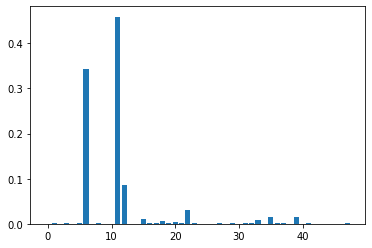

In [14]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
data_binary = data_binary.iloc[:, [6,11,12,15,22,35,39,48]]
X = data_binary.iloc[:,:-1]
y = data_binary.iloc[:,-1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:


params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1281,    9],
       [  11, 1252]], dtype=int64)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1290,    0],
       [   5, 1258]], dtype=int64)

In [ ]:
'''
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
'''
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf').fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

'''

"\nfrom sklearn.svm import SVC\nsvm_clf = SVC(kernel = 'rbf').fit(X_train, y_train)\n\ny_pred = svm_clf.predict(X_test)\nconfusion_matrix(y_test, y_pred)\n\n"

In [30]:
X = data_multi.iloc[:,:-1]
y = data_multi.iloc[:,-1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier()

Feature: 0, Score: 0.00271
Feature: 1, Score: 0.00645
Feature: 2, Score: 0.00067
Feature: 3, Score: 0.00294
Feature: 4, Score: 0.01026
Feature: 5, Score: 0.00045
Feature: 6, Score: 0.10430
Feature: 7, Score: 0.09938
Feature: 8, Score: 0.12883
Feature: 9, Score: 0.15820
Feature: 10, Score: 0.16355
Feature: 11, Score: 0.12633
Feature: 12, Score: 0.00991
Feature: 13, Score: 0.00382
Feature: 14, Score: 0.00312
Feature: 15, Score: 0.01123
Feature: 16, Score: 0.00449
Feature: 17, Score: 0.00260
Feature: 18, Score: 0.00863
Feature: 19, Score: 0.00866
Feature: 20, Score: 0.01146
Feature: 21, Score: 0.01006
Feature: 22, Score: 0.01008
Feature: 23, Score: 0.01106
Feature: 24, Score: 0.02617
Feature: 25, Score: 0.00076
Feature: 26, Score: 0.00069
Feature: 27, Score: 0.01370
Feature: 28, Score: 0.00075
Feature: 29, Score: 0.00048
Feature: 30, Score: 0.00776
Feature: 31, Score: 0.00787
Feature: 32, Score: 0.00708
Feature: 33, Score: 0.00799
Feature: 34, Score: 0.00903
Feature: 35, Score: 0.00557
Fe

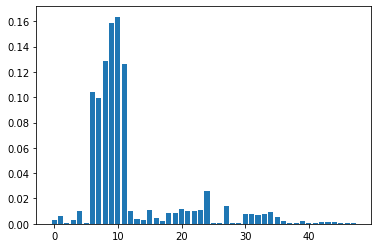

In [32]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
data_multi = data_multi.iloc[:, [6,7,8,9,10,11,15,20,21,22,23,24,27,48]]
X = data_multi.iloc[:,:-1]
y = data_multi.iloc[:,-1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
clf_multi = RandomForestClassifier(n_estimators=100)
clf_multi.fit(X_train, y_train)

y_pred = clf_multi.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[251,   0,   0,   0,   0],
       [  0, 123,   0,   4,   1],
       [  0,   0, 203,   0,   0],
       [  0,   0,   1, 354,   0],
       [  0,   0,   0,   0, 335]], dtype=int64)

In [35]:
y_pred = clf_multi.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[602,   0,   0,   0,   0],
       [  0, 285,   0,   0,   0],
       [  0,   0, 448,   0,   0],
       [  0,   0,   0, 898,   0],
       [  0,   0,   0,   0, 734]], dtype=int64)